In [1]:
# python warning off
import warnings
warnings.filterwarnings('ignore')

# tensorflow warning off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from sklearn.preprocessing import MinMaxScaler  # 0.0 ~ 1.0 사이로 스케일링
from sklearn.preprocessing import LabelEncoder  # String ==> int
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
from keras.utils import np_utils

In [6]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [7]:
names = ['sl', 'sw', 'pl', 'pw', 'class']

In [8]:
df = pd.read_csv('datasets/iris.data', names=names)

In [9]:
df

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
Y_encoded = LabelEncoder().fit_transform(df['class'])
# 'Iris-setosa' ==> 0, 'Iris-versicolor' ==> 1, 'Iris-virginica' ==> 2

In [13]:
Y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
Y = np_utils.to_categorical(Y_encoded)  # One Hot Encoding
# 0 ==> [1,0,0], 1 ==> [0,1,0], 2 ==> [0,0,1]

In [15]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
X = df.drop('class', axis=1)

In [17]:
X

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [19]:
check_pointer = ModelCheckpoint(filepath='iris_model.h5', monitor='val_loss',
                               verbose=1, save_best_only=True)

In [20]:
early_stoper = EarlyStopping(monitor='val_loss', patience=3)

In [21]:
model = Sequential()

In [22]:
model.add(Dense(256, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1280      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
%%time
hist = model.fit(X_train, y_train, epochs=50, validation_split=0.1,
                 callbacks=[check_pointer, early_stoper])

Train on 121 samples, validate on 14 samples
Epoch 1/50
121/121 [==============================] - 0s 4ms/step - loss: 1.0442 - acc: 0.4050 - val_loss: 0.8586 - val_acc: 0.6429

Epoch 00001: val_loss improved from inf to 0.85858, saving model to iris_model.h5
Epoch 2/50
121/121 [==============================] - 0s 116us/step - loss: 0.8743 - acc: 0.7438 - val_loss: 0.7625 - val_acc: 1.0000

Epoch 00002: val_loss improved from 0.85858 to 0.76249, saving model to iris_model.h5
Epoch 3/50
121/121 [==============================] - 0s 116us/step - loss: 0.7537 - acc: 0.8182 - val_loss: 0.7124 - val_acc: 0.6429

Epoch 00003: val_loss improved from 0.76249 to 0.71237, saving model to iris_model.h5
Epoch 4/50
121/121 [==============================] - 0s 83us/step - loss: 0.6607 - acc: 0.6777 - val_loss: 0.6199 - val_acc: 0.6429

Epoch 00004: val_loss improved from 0.71237 to 0.61991, saving model to iris_model.h5
Epoch 5/50
121/121 [==============================] - 0s 107us/step - loss: 0.

121/121 [==============================] - 0s 91us/step - loss: 0.0971 - acc: 0.9587 - val_loss: 0.0325 - val_acc: 1.0000

Epoch 00039: val_loss improved from 0.03446 to 0.03250, saving model to iris_model.h5
Epoch 40/50
121/121 [==============================] - 0s 107us/step - loss: 0.0830 - acc: 0.9752 - val_loss: 0.0298 - val_acc: 1.0000

Epoch 00040: val_loss improved from 0.03250 to 0.02982, saving model to iris_model.h5
Epoch 41/50
121/121 [==============================] - 0s 99us/step - loss: 0.0845 - acc: 0.9752 - val_loss: 0.0381 - val_acc: 1.0000

Epoch 00041: val_loss did not improve from 0.02982
Epoch 42/50
121/121 [==============================] - 0s 116us/step - loss: 0.0904 - acc: 0.9669 - val_loss: 0.0383 - val_acc: 1.0000

Epoch 00042: val_loss did not improve from 0.02982
Epoch 43/50
121/121 [==============================] - 0s 107us/step - loss: 0.0938 - acc: 0.9587 - val_loss: 0.0273 - val_acc: 1.0000

Epoch 00043: val_loss improved from 0.02982 to 0.02728, savi

In [25]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


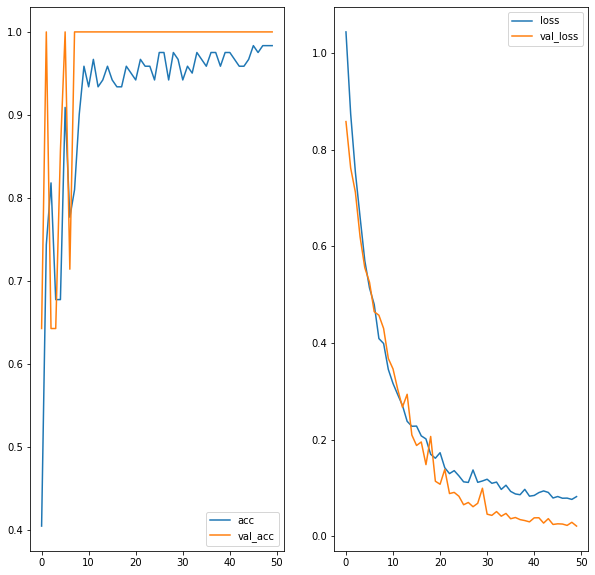

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)  # 121
plt.plot(hist.history['acc'])     # train accuracy
plt.plot(hist.history['val_acc']) # validation accuracy
plt.title('accuracy')
plt.legend(['acc', 'val_acc'])
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])      # train loss
plt.plot(hist.history['val_loss'])  # validation loss
plt.title('loss')
plt.legend(['loss', 'val_loss'])
plt.show()